# Personal Information
Name: **András Fajkusz**

StudentID: **15086887**

Email: [**andras.fajkusz@student.uva.nl**](andras.fajkusz@student.uva.nl)

Submitted on: **22.03.2024**

Github: [**https://github.com/faja1234/Thesis_AFajkusz_UvA_2024**](https://github.com/faja1234/Thesis_AFajkusz_UvA_2024)

# Data Context
**The main datasource of this thesis is Kaggle's Loan Club Dataset, available on the following link: [Lending Club 2007-2020Q3](https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1/data).**

Lending Club is a financial services company, which operates a peer-to-peer lending website for personal loans and is headquartered in San Francisco, California. The company assesses applicants’ risk and lets investors lend directly to individuals, or potentially divide their investments over a portfolio of different loans.

The dataset provides information about multiple years of peer-to-peer loans, making it a useful dataset for developing credit scoring models. The data contains information about past loan applicants and whether their loan outcomes. One of the main tasks of this study is to identify patterns which indicate if a person is likely to default, which may be used for takin actions such as denying the loan, reducing the amount of loan, rising the interest rate etc.


# Data Description

The source file contains multiple years of data, out of which 100,000 loans' information was loaded into the working data frame. The data had originally 142 columns, for which a data dictionary was provided in a Microsoft Excel .xlsx file, which was also loaded.

108 columns contain numerical values, and 34 columns contain categorical variables. As loan status will be the target variable during the thesis project, the Exploratory Data Analysis has a focus on its relationship to other variables, besides uncovering the distributions, outliers and important descriptors of potential predictor variables.

**Loan status**
- 62683 Fully Paid Loans
- 21520 Current Loans
- 14432 Charged Off Loans
- 809 Late Loans
- 6 Defaulted Loans
- 550 Loans do not meet the credit policy

The distribution of loan statuses shows a significant class imbalance, as "good loans", which are fully paid or current are overrepresented compared to "bad loans", that are late, charged off, or defaulted.

The detailed analysis of the dataset is found in the next chapter.

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import hvplot.pandas

### Data Loading

In [2]:
pd.set_option('display.float', '{:.2f}'.format)

In [3]:
skip_indices = [i for i in range(1, 2500000) if i % 5 != 0]
data=pd.read_csv("../data/Loan_status_2007-2020Q3.gzip", nrows=100000, skiprows=skip_indices)
data

C:\Users\Andras\AppData\Local\Temp\ipykernel_13428\1418256430.py:2: DtypeWarning: Columns (48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("../data/Loan_status_2007-2020Q3.gzip", nrows=100000, skiprows=skip_indices)


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,4,1075358,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,9,1071570,5375,5375,5350.00,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,14,1069057,10000,10000,10000.00,36 months,10.65%,325.74,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,19,1069742,9200,9200,9200.00,36 months,6.03%,280.01,A,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,24,1069559,6000,6000,6000.00,36 months,11.71%,198.46,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27913,129831917,10600,10600,10600.00,36 months,9.43%,339.21,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
99996,27918,129434582,8000,8000,8000.00,36 months,15.04%,277.48,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
99997,27923,129280325,30000,30000,29750.00,36 months,10.90%,980.75,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
99998,27928,128657401,28000,28000,28000.00,60 months,18.06%,711.94,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [4]:
data.describe()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,99999.00,99892.00,99995.00,100000.00,...,7112.00,7112.00,7112.00,3080.00,4063.00,3080.00,3080.00,3994.00,4063.00,4063.00
mean,67134.28,66844956.06,14460.42,14436.42,14371.09,434.08,75331.53,18.17,0.26,701.64,...,12.58,0.06,0.09,2.24,142.91,2.24,3.01,235.77,7430.53,691.54
std,48439.95,58201001.32,9071.41,9061.00,9082.40,265.59,66872.41,17.39,0.79,33.96,...,8.14,0.48,0.45,0.57,268.29,0.57,6.96,329.42,6937.17,1585.44
min,1.00,55742.00,500.00,500.00,0.00,7.61,0.00,0.00,0.00,610.00,...,0.00,0.00,0.00,2.00,0.00,2.00,0.00,0.00,0.00,0.01
25%,25000.50,4215163.25,7500.00,7500.00,7500.00,241.57,45000.00,11.18,0.00,675.00,...,7.00,0.00,0.00,2.00,0.00,2.00,0.00,36.38,1779.43,257.13
50%,59842.50,113010983.50,12000.00,12000.00,12000.00,371.58,64000.00,17.01,0.00,695.00,...,11.00,0.00,0.00,2.00,0.00,2.00,0.00,120.81,5352.27,410.91
75%,101508.75,120956052.25,20000.00,20000.00,20000.00,573.01,90000.00,23.39,0.00,720.00,...,17.00,0.00,0.00,2.00,194.78,2.00,0.00,320.92,11456.11,670.68
max,188178.00,130970232.00,40000.00,40000.00,40000.00,1719.83,7200000.00,999.00,30.00,845.00,...,92.00,17.00,12.00,4.00,1714.54,4.00,38.00,5191.31,39746.94,29279.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(98), int64(10), object(34)
memory usage: 108.3+ MB


The descriptions of the different columns are listed below:

In [6]:
des_label = pd.read_excel('../data/LCDataDictionary.xlsx').dropna(axis=1, how='all', inplace=False)
des_label

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed t...
149,settlement_percentage,The settlement amount as a percentage of the p...
150,settlement_term,The number of months that the borrower will be...
151,NaN,NaN


### Analysis 1: 
As part of the data set analysis, the inspection of the to-be-target variables is necessary, to gain a deeper understanding of the data.

Following this, the correlation between the numerical features is explored.

In [7]:
data.set_index('id', inplace=True)
data.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,
1075358,4,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1071570,9,5375,5375,5350.00,60 months,12.69%,121.45,B,B5,Starbucks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1069057,14,10000,10000,10000.00,36 months,10.65%,325.74,B,B2,SFMTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1069742,19,9200,9200,9200.00,36 months,6.03%,280.01,A,A1,Network Interpreting Service,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1069559,24,6000,6000,6000.00,36 months,11.71%,198.46,B,B3,bmg-educational,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [8]:
data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count',
    width=500, height=350, rot=45
)

:Bars   [index]   (loan_status)

As the graph shows, there is a significant class imbalance present in the data, as most loans are paid back successfully, and just a smaller proportion is late or charged off.

In [9]:
data = data[data['loan_status'].isin(['Fully Paid', 'Current', 'Charged Off', 'Late (16-30 days)', 'Late (31-120 days)', 'Default', 'In Grace Period'])]

In [10]:
corr_matrix = data.corr()
corr_matrix
#loan_status_corr = corr_matrix['loan_status']
#loan_status_corr.drop('loan_status').nlargest(10)

C:\Users\Andras\AppData\Local\Temp\ipykernel_13428\2789164369.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
Unnamed: 0,1.00,-0.01,-0.00,-0.00,0.02,-0.01,-0.01,-0.01,-0.05,-0.05,...,0.01,0.01,-0.01,0.04,0.03,0.04,0.06,-0.00,-0.05,-0.03
loan_amnt,-0.01,1.00,1.00,1.00,0.95,0.32,0.05,-0.00,0.09,0.09,...,0.21,-0.06,-0.08,0.07,0.24,0.07,0.03,0.49,0.72,0.22
funded_amnt,-0.00,1.00,1.00,1.00,0.95,0.32,0.05,-0.00,0.09,0.09,...,0.21,-0.06,-0.08,0.07,0.24,0.07,0.03,0.49,0.72,0.22
funded_amnt_inv,-0.00,1.00,1.00,1.00,0.95,0.31,0.06,-0.00,0.09,0.09,...,0.21,-0.06,-0.08,0.07,0.24,0.07,0.03,0.49,0.72,0.22
installment,0.02,0.95,0.95,0.95,1.00,0.31,0.05,0.01,0.03,0.03,...,0.19,-0.05,-0.06,0.09,0.30,0.09,0.07,0.39,0.51,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hardship_length,0.04,0.07,0.07,0.07,0.09,0.01,0.01,0.01,-0.01,-0.01,...,0.05,0.07,0.05,1.00,0.35,1.00,0.26,0.43,0.13,-0.12
hardship_dpd,0.06,0.03,0.03,0.03,0.07,0.00,0.01,0.04,-0.03,-0.03,...,-0.08,-0.03,-0.06,0.26,0.48,0.26,1.00,0.09,0.10,-0.00
orig_projected_additional_accrued_interest,-0.00,0.49,0.49,0.49,0.39,0.11,0.05,-0.00,-0.05,-0.05,...,0.14,-0.03,-0.05,0.43,0.07,0.43,0.09,1.00,0.76,-0.06
hardship_payoff_balance_amount,-0.05,0.72,0.72,0.72,0.51,0.23,0.05,-0.03,0.09,0.09,...,0.18,-0.08,-0.10,0.13,-0.03,0.13,0.10,0.76,1.00,-0.08


Most numeric features do not show strong correlation with each other, except for features that represent similar and related financial concepts. Such features are the FICO low and high scores, which are both related to the credit scores of the individuals created by Fair, Isaac and Company. Other related features are the installments, loan amounts, and funded loan amounts, which are all related to the amount of money granted to the loanee.

To get a better understanding of the distributions of the aforementioned related features, histograms of them are presented below.

In [11]:
installment = data.hvplot.hist(
    y='installment', by='loan_status', subplots=False,
    width=600, height=300, bins=50, alpha=0.4,
    title="Installment by Loan Status",
    xlabel='Installment', ylabel='Counts', legend='top', fontsize={'title': '8pt', 'legend':'6pt'}
)

loan_amnt = data.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False,
    width=600, height=300, bins=30, alpha=0.4,
    title="Loan Amount by Loan Status",
    xlabel='Loan Amount', ylabel='Counts', legend='top', fontsize={'title': '8pt', 'legend':'6pt'}
)

funded_amnt = data.hvplot.hist(
    y='funded_amnt', by='loan_status', subplots=False,
    width=600, height=300, bins=30, alpha=0.4,
    title="Funded Amount by Loan Status",
    xlabel='Funded Amount', ylabel='Counts', legend='top', fontsize={'title': '8pt', 'legend':'6pt'}
)

funded_amnt_inv = data.hvplot.hist(
    y='funded_amnt_inv', by='loan_status', subplots=False,
    width=600, height=300, bins=30, alpha=0.4,
    title="Investor Funded Amount by Loan Status",
    xlabel='Investor Funded Amount', ylabel='Counts', legend='top', fontsize={'title': '8pt', 'legend':'6pt'}
)


grid_layout = (installment + loan_amnt + funded_amnt + funded_amnt_inv).cols(1)
grid_layout

:Layout
   .NdOverlay.I   :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II  :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)
   .NdOverlay.III :NdOverlay   [loan_status]
      :Histogram   [funded_amnt]   (funded_amnt_count)
   .NdOverlay.IV  :NdOverlay   [loan_status]
      :Histogram   [funded_amnt_inv]   (funded_amnt_inv_count)

To understand the relation of the approved loan amounts and the outcome of the loan, the below table is presented:

In [12]:
data.groupby(by='loan_status')[['loan_amnt','annual_inc']].describe()

loan_amnt                                               \
                       count     mean      std      min      25%      50%   
loan_status                                                                 
Charged Off         14432.00 15500.85  9153.76  1000.00  8400.00 14000.00   
Current             21520.00 15863.00 10004.50  1000.00  8000.00 14000.00   
Default                 6.00 12062.50  3963.51 10000.00 10043.75 10187.50   
Fully Paid          62683.00 13755.46  8614.45   500.00  7037.50 12000.00   
In Grace Period       311.00 17771.38 10675.60  1200.00  9600.00 15450.00   
Late (16-30 days)      66.00 15338.26 10288.64  2000.00  8000.00 12000.00   
Late (31-120 days)    432.00 15995.20  9860.12  1000.00  8500.00 14000.00   

                                     annual_inc                             \
                        75%      max      count     mean      std      min   
loan_status                                                                  
Charged Off        20500.00 40000.00   14432.00 68442.93 42971.57     0.00   
Current            21481.25 40000.00   21520.00 79866.39 71330.82     0.00   
Default            11550.00 20000.00       6.00 54288.67 55111.89  7932.00   
Fully Paid         19200.00 40000.00   62683.00 75337.37 69781.15     0.00   
In Grace Period    25000.00 40000.00     311.00 83186.09 59153.96  7749.00   
Late (16-30 days)  20750.00 40000.00      66.00 87475.21 77068.10 13000.00   
Late (31-120 days) 20000.00 40000.00     432.00 72702.63 42887.31  6456.00   

                                                           
                        25%      50%       75%        max  
loan_status                                                
Charged Off        42000.00 60000.00  82000.00  950000.00  
Current            45000.00 65000.00  95000.00 4784000.00  
Default            18700.00 27400.00  87250.00  140000.00  
Fully Paid         45000.00 64320.00  90000.00 7200000.00  
In Grace Period    45000.00 70000.00 100000.00  400000.00  
Late (16-30 days)  42577.50 72000.00 105750.00  500000.00  
Late (31-120 days) 45000.00 60000.00  89190.00  260000.00

In the following section the relationship of different important categorical features, loan amounts and loan outcomes is examined by plotting the loan amounts for all categories, colored by the loan outcome.

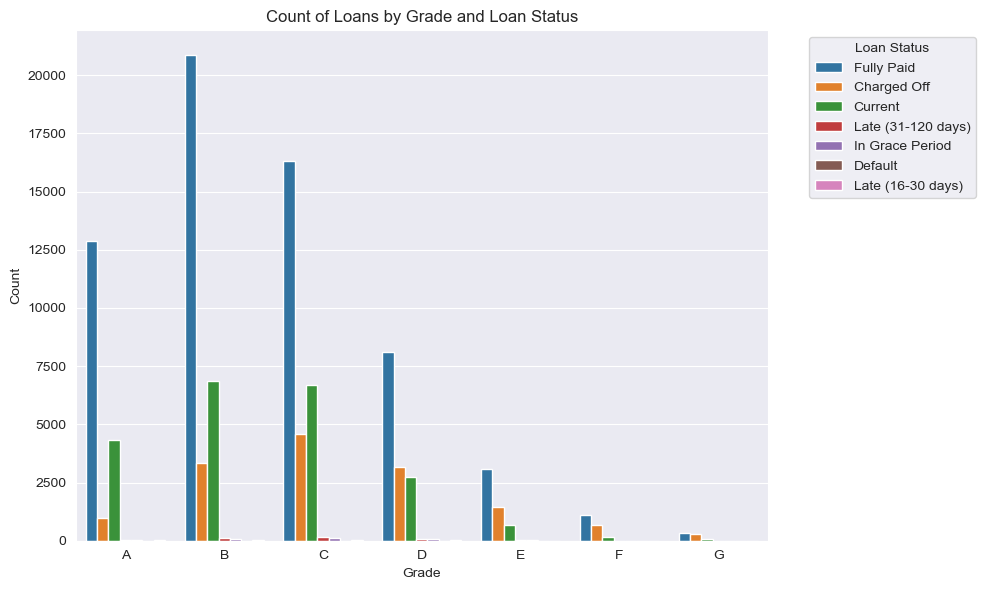

In [13]:
grade_order = sorted(data['grade'].unique())
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='grade', hue='loan_status', order=grade_order)
plt.title('Count of Loans by Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

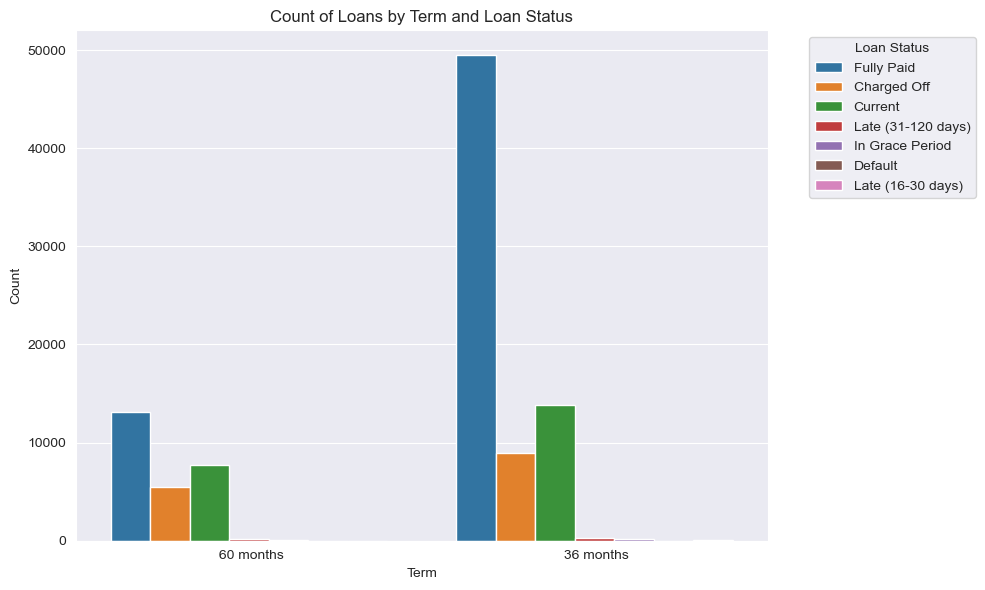

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='term', hue='loan_status')
plt.title('Count of Loans by Term and Loan Status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
data['home_ownership'].value_counts()

MORTGAGE    48920
RENT        40151
OWN         10340
OTHER          29
NONE           10
Name: home_ownership, dtype: int64

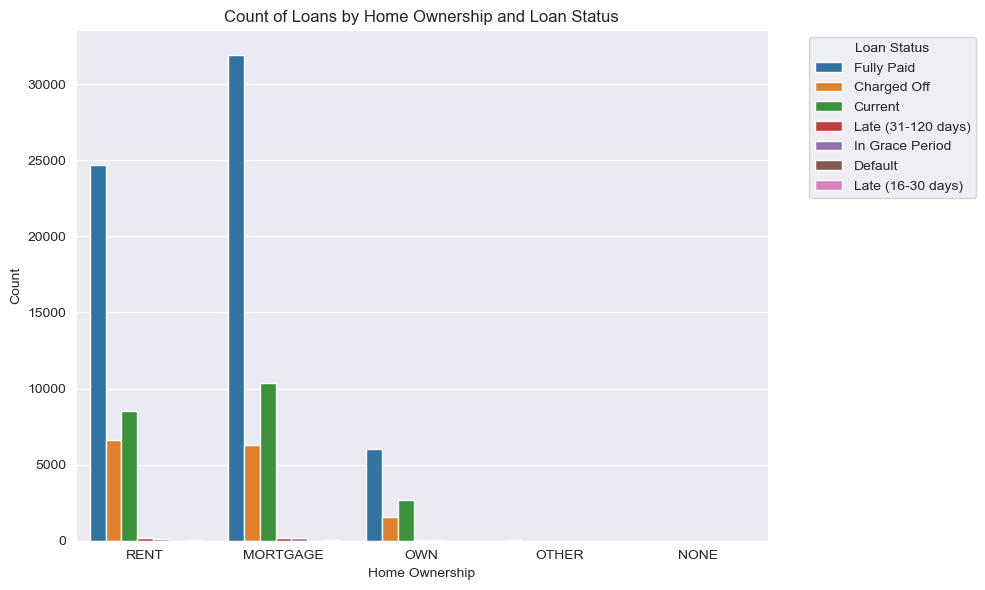

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='home_ownership', hue='loan_status')
plt.title('Count of Loans by Home Ownership and Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

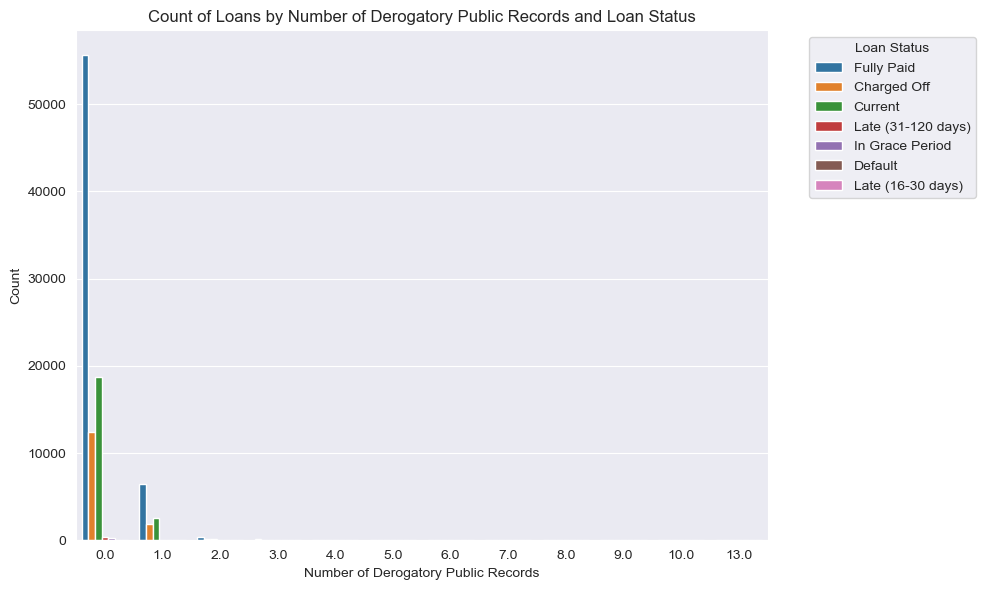

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='pub_rec', hue='loan_status')
plt.title('Count of Loans by Number of Derogatory Public Records and Loan Status')
plt.xlabel('Number of Derogatory Public Records')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

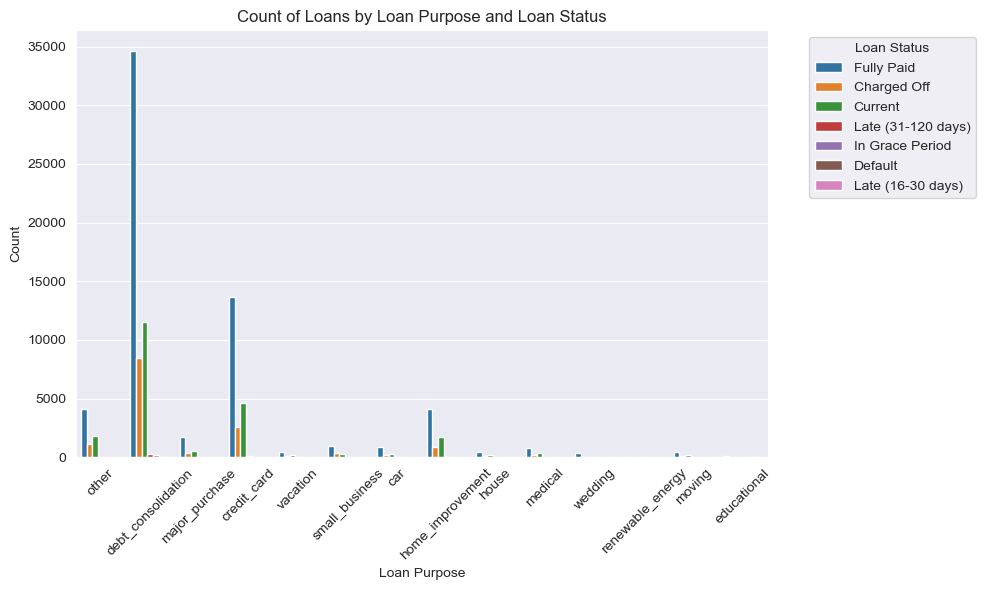

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='purpose', hue='loan_status')
plt.title('Count of Loans by Loan Purpose and Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

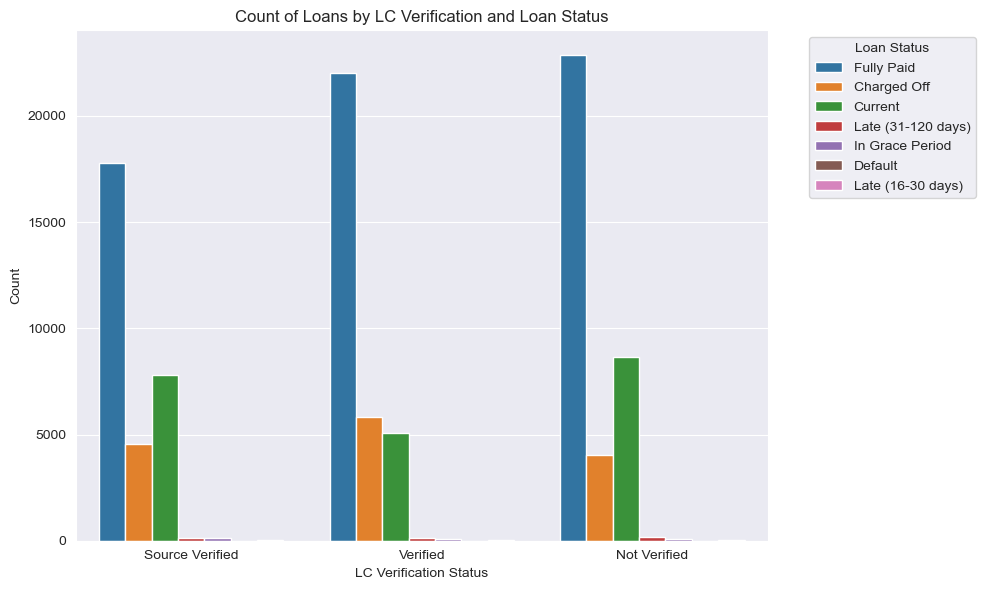

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='verification_status', hue='loan_status')
plt.title('Count of Loans by LC Verification and Loan Status')
plt.xlabel('LC Verification Status')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
data['int_rate'] = data['int_rate'].str.replace('%', '').astype(float) / 100

C:\Users\Andras\AppData\Local\Temp\ipykernel_13428\1585734826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['int_rate'] = data['int_rate'].str.replace('%', '').astype(float) / 100


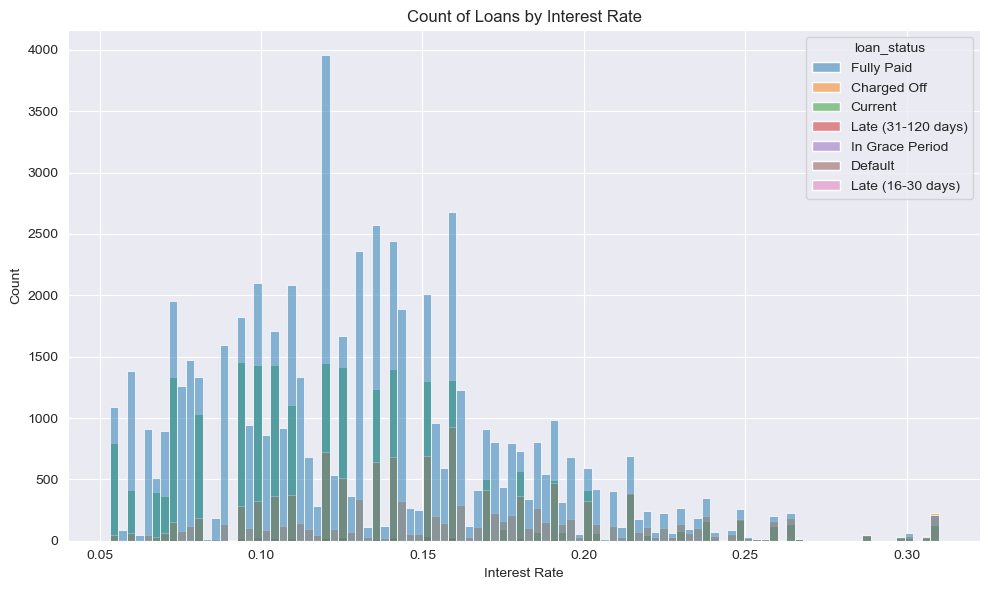

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='int_rate', hue='loan_status')
plt.title('Count of Loans by Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
#plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
data[data['int_rate']>0.125]['loan_status'].value_counts()

Fully Paid            32591
Charged Off           10708
Current               10306
Late (31-120 days)      269
In Grace Period         196
Late (16-30 days)        41
Default                   6
Name: loan_status, dtype: int64

In [23]:
data[data['int_rate']<=0.125]['loan_status'].value_counts()

Fully Paid            30092
Current               11214
Charged Off            3724
Late (31-120 days)      163
In Grace Period         115
Late (16-30 days)        25
Name: loan_status, dtype: int64

As presented in the tables above, the interest rate might be an important feature for predicting the loan outcomes, as for higher interest rates significantly more loans are charged off. It's important to keep in mind that it is not necessarily a result of causation.

In [24]:
data["purpose"].str.lower().value_counts()[:10]

debt_consolidation    55086
credit_card           20915
other                  7023
home_improvement       6672
major_purchase         2636
small_business         1538
medical                1379
car                    1310
house                   811
vacation                747
Name: purpose, dtype: int64

In [25]:
data['dti'].info()

<class 'pandas.core.series.Series'>
Int64Index: 99450 entries, 1075358 to 129834559
Series name: dti
Non-Null Count  Dtype  
--------------  -----  
99342 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


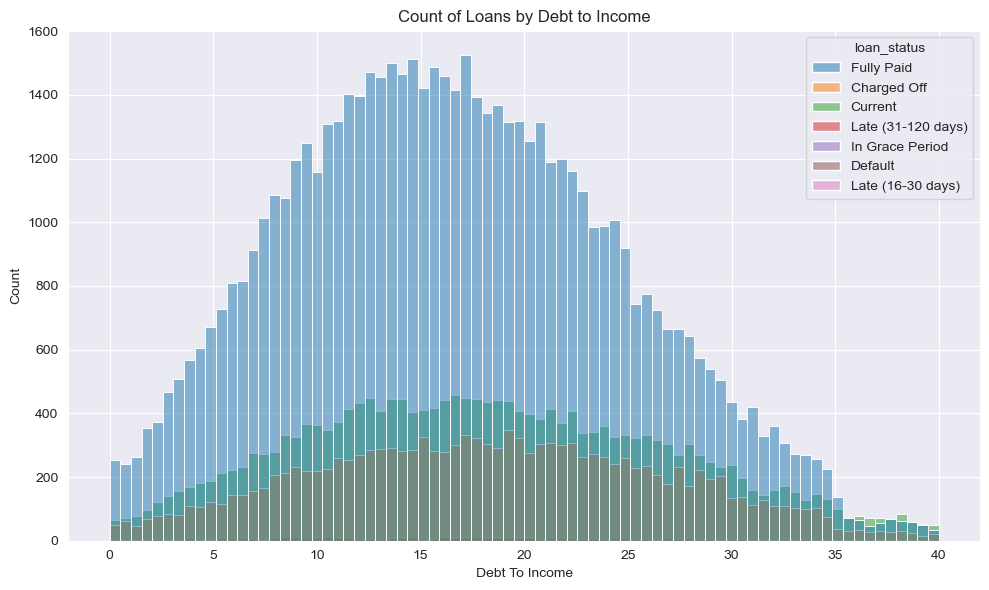

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['dti']<40], x='dti', hue='loan_status')
plt.title('Count of Loans by Debt to Income')
plt.xlabel('Debt To Income')
plt.ylabel('Count')
#plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

As there are multiple columns with significant amount of missing data, we search for these columns and remove them from the dataset. Imputation is not an option for such a dataset, as financial data is highly sensitive and each row should be treated with integrity.

In [27]:
# Missing values
cols_to_remove=[]
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        if portion>10:
            cols_to_remove.append(column)
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")
cols_to_remove

'emp_title': number of missing values '7111' ==> '7.150%'
'emp_length': number of missing values '5991' ==> '6.024%'
'title': number of missing values '6' ==> '0.006%'
'dti': number of missing values '108' ==> '0.109%'
'mths_since_last_delinq': number of missing values '54892' ==> '55.196%'
'mths_since_last_record': number of missing values '87319' ==> '87.802%'
'revol_util': number of missing values '95' ==> '0.096%'
'last_pymnt_d': number of missing values '128' ==> '0.129%'
'next_pymnt_d': number of missing values '77115' ==> '77.541%'
'last_credit_pull_d': number of missing values '4' ==> '0.004%'
'collections_12_mths_ex_med': number of missing values '12' ==> '0.012%'
'mths_since_last_major_derog': number of missing values '79040' ==> '79.477%'
'annual_inc_joint': number of missing values '92338' ==> '92.849%'
'dti_joint': number of missing values '92338' ==> '92.849%'
'verification_status_joint': number of missing values '92357' ==> '92.868%'
'tot_coll_amt': number of missing val

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75

In [117]:
data_clean = data.drop(cols_to_remove, axis='columns')
data_clean.drop('Unnamed: 0', axis='columns', inplace=True)
data_clean.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,policy_code,acc_now_delinq,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mort_acc,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit
count,99450.00,99450.00,99450.00,99450.00,99450.00,99450.00,99342.00,99450.00,99450.00,99450.00,...,99450.00,99450.00,89991.00,99438.00,99450.00,89991.00,99313.00,99441.00,89991.00,89991.00
mean,14488.03,14465.14,14415.17,0.13,434.79,75336.78,18.19,0.26,701.73,705.73,...,1.00,0.00,4.26,0.01,9.55,1.55,0.11,0.03,47950.04,22823.95
std,9076.18,9065.68,9077.22,0.05,265.68,66878.07,17.43,0.79,33.96,33.97,...,0.00,0.06,2.99,0.10,653.77,1.94,0.32,0.26,47479.95,22253.90
min,500.00,500.00,0.00,0.05,7.61,0.00,0.00,0.00,660.00,664.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7550.00,7500.00,7500.00,0.10,242.83,45000.00,11.19,0.00,675.00,679.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,19447.50,8300.00
50%,12000.00,12000.00,12000.00,0.13,371.68,64000.00,17.03,0.00,695.00,699.00,...,1.00,0.00,4.00,0.00,0.00,1.00,0.00,0.00,35311.00,16200.00
75%,20000.00,20000.00,20000.00,0.16,573.97,90000.00,23.41,0.00,720.00,724.00,...,1.00,0.00,6.00,0.00,0.00,2.00,0.00,0.00,60250.50,29900.00
max,40000.00,40000.00,40000.00,0.31,1719.83,7200000.00,999.00,30.00,845.00,850.00,...,1.00,7.00,46.00,8.00,138474.00,31.00,5.00,13.00,1276247.00,462200.00


To find the columns that have the largest correlation with the target feature, the correlations of the numerical features to the loan outcome were plotted. It is visible that recovery-related features show significant negative correlation to the loan being paid off. This is a result of recoveries being collected after a loan being charged off, therefore these features are not useful for predicting the outcome of the loan. 

Strong correlation is visible for the FICO scores, and principal-related features.

In [118]:
data_clean['loan_status_num']=data_clean.loan_status.map({'Fully Paid':1, 'Charged Off':0})
data_clean.corr()['loan_status_num'].drop('loan_status_num').sort_values().hvplot.barh(
    width=600, height=400,
    title="Correlation between Loan status and Numeric Features",
    ylabel='Correlation', xlabel='Numerical Features', fontsize={'title': '8pt', 'ticks':'6pt'}
)

C:\Users\Andras\AppData\Local\Temp\ipykernel_13428\2052325297.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean.corr()['loan_status_num'].drop('loan_status_num').sort_values().hvplot.barh(


:Bars   [index]   (loan_status_num)

In [119]:
corr_matrix = data_clean.corr()
corr_matrix

C:\Users\Andras\AppData\Local\Temp\ipykernel_13428\555978256.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_clean.corr()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,acc_now_delinq,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mort_acc,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,loan_status_num
loan_amnt,1.00,1.00,1.00,0.13,0.95,0.32,0.05,-0.00,0.09,0.09,...,0.00,0.01,0.00,0.00,0.22,-0.06,0.02,0.28,0.36,-0.08
funded_amnt,1.00,1.00,1.00,0.13,0.95,0.32,0.05,-0.00,0.09,0.09,...,0.00,0.01,0.00,0.00,0.22,-0.06,0.02,0.28,0.36,-0.08
funded_amnt_inv,1.00,1.00,1.00,0.13,0.95,0.31,0.06,-0.00,0.09,0.09,...,0.00,0.01,0.00,0.00,0.22,-0.06,0.02,0.28,0.36,-0.08
int_rate,0.13,0.13,0.13,1.00,0.16,-0.05,0.09,0.09,-0.50,-0.50,...,0.02,0.15,0.02,0.00,-0.09,0.05,0.02,0.02,-0.26,-0.22
installment,0.95,0.95,0.95,0.16,1.00,0.31,0.05,0.01,0.03,0.03,...,0.00,0.02,0.00,0.00,0.18,-0.06,0.02,0.26,0.33,-0.07
annual_inc,0.32,0.32,0.31,-0.05,0.31,1.00,-0.11,0.05,0.05,0.05,...,0.01,0.07,0.01,0.01,0.22,-0.03,0.07,0.35,0.29,0.04
dti,0.05,0.05,0.06,0.09,0.05,-0.11,1.00,-0.01,-0.03,-0.03,...,-0.00,0.07,-0.00,-0.00,-0.00,0.00,-0.02,0.16,0.04,-0.05
delinq_2yrs,-0.00,-0.00,-0.00,0.09,0.01,0.05,-0.01,1.00,-0.18,-0.18,...,0.10,-0.04,0.14,0.03,0.08,-0.04,0.01,0.03,-0.07,-0.02
fico_range_low,0.09,0.09,0.09,-0.50,0.03,0.05,-0.03,-0.18,1.00,1.00,...,-0.03,-0.09,-0.05,-0.01,0.10,-0.18,-0.06,0.02,0.37,0.11
fico_range_high,0.09,0.09,0.09,-0.50,0.03,0.05,-0.03,-0.18,1.00,1.00,...,-0.03,-0.09,-0.05,-0.01,0.10,-0.18,-0.06,0.02,0.37,0.11


Below the intra-category distributions are visible for important categorical features.

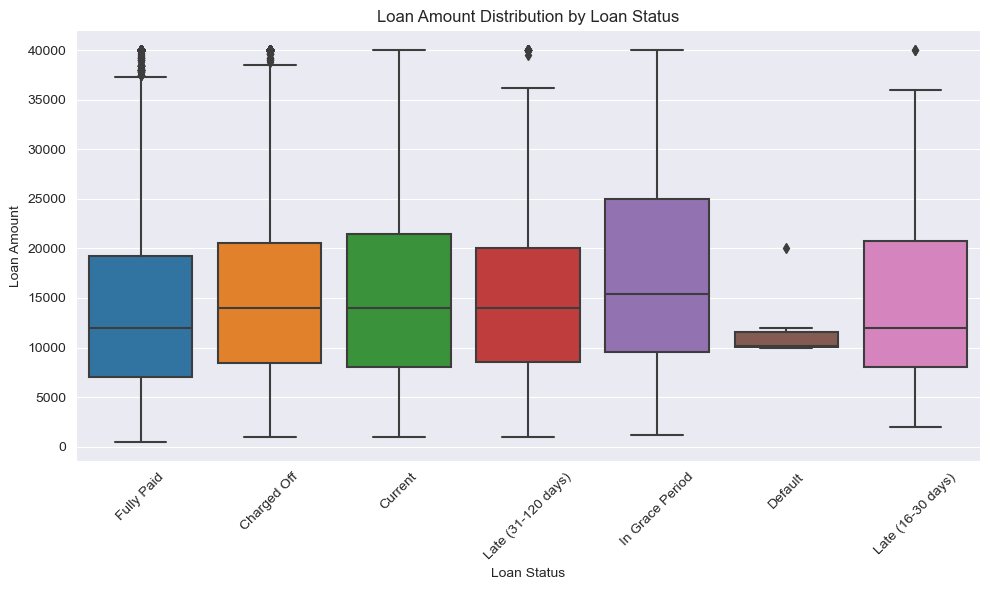

In [120]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(data=data, x='loan_status', y='loan_amnt')
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

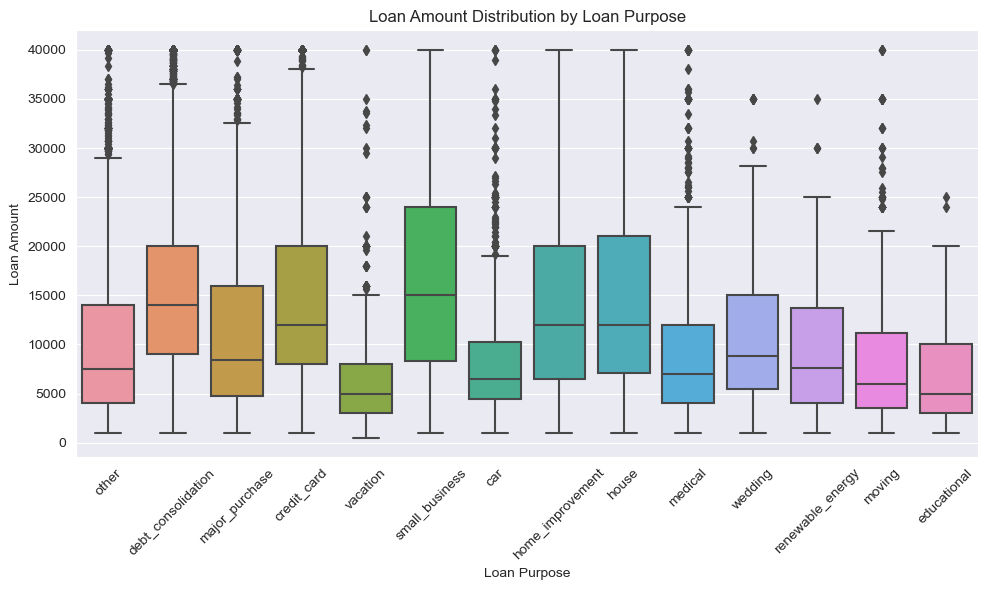

In [121]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(data=data, x='purpose', y='loan_amnt')
plt.title('Loan Amount Distribution by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

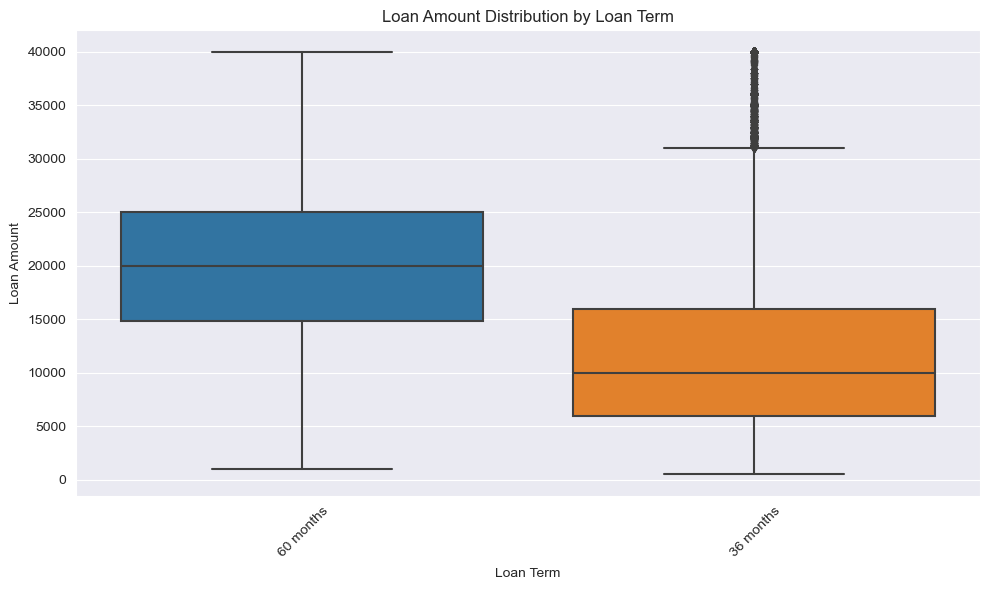

In [122]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(data=data, x='term', y='loan_amnt')
plt.title('Loan Amount Distribution by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [123]:
data_clean.nunique()

loan_amnt                1430
funded_amnt              1432
funded_amnt_inv          2909
term                        2
int_rate                  467
                        ...  
total_bal_ex_mort       59488
total_bc_limit           4209
hardship_flag               2
debt_settlement_flag        2
loan_status_num             2
Length: 62, dtype: int64

In [124]:
for year in data_clean.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data_clean[data_clean.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

1 year years in this position:
Fully Paid           0.64
Current              0.20
Charged Off          0.15
Late (31-120 days)   0.00
In Grace Period      0.00
Late (16-30 days)    0.00
Name: loan_status, dtype: float64
< 1 year years in this position:
Fully Paid           0.59
Current              0.25
Charged Off          0.15
Late (31-120 days)   0.00
In Grace Period      0.00
Late (16-30 days)    0.00
Name: loan_status, dtype: float64
3 years years in this position:
Fully Paid           0.64
Current              0.21
Charged Off          0.15
Late (31-120 days)   0.01
In Grace Period      0.00
Late (16-30 days)    0.00
Default              0.00
Name: loan_status, dtype: float64
6 years years in this position:
Fully Paid           0.67
Current              0.16
Charged Off          0.16
Late (31-120 days)   0.00
In Grace Period      0.00
Late (16-30 days)    0.00
Name: loan_status, dtype: float64
7 years years in this position:
Fully Paid           0.68
Current              0.17
Ch

In [125]:
data_clean.drop(['funded_amnt', 'funded_amnt_inv', 'emp_title', 'url', 'title', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_fico_range_high', 'fico_range_high', 'total_pymnt_inv', 'grade', 'debt_settlement_flag'], axis=1, inplace=True)

In [126]:
for column in data_clean.columns:
    if data_clean[column].isna().sum() != 0:
        missing = data_clean[column].isna().sum()
        portion = (missing / data_clean.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'dti': number of missing values '108' ==> '0.109%'
'revol_util': number of missing values '95' ==> '0.096%'
'collections_12_mths_ex_med': number of missing values '12' ==> '0.012%'
'acc_open_past_24mths': number of missing values '9459' ==> '9.511%'
'chargeoff_within_12_mths': number of missing values '12' ==> '0.012%'
'mort_acc': number of missing values '9459' ==> '9.511%'
'pub_rec_bankruptcies': number of missing values '137' ==> '0.138%'
'tax_liens': number of missing values '9' ==> '0.009%'
'total_bal_ex_mort': number of missing values '9459' ==> '9.511%'
'total_bc_limit': number of missing values '9459' ==> '9.511%'
'hardship_flag': number of missing values '983' ==> '0.988%'
'loan_status_num': number of missing values '22335' ==> '22.459%'


In [127]:
data_clean.corr()['mort_acc'].drop('mort_acc').sort_values(ascending=False)

C:\Users\Andras\AppData\Local\Temp\ipykernel_13428\3422446252.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean.corr()['mort_acc'].drop('mort_acc').sort_values(ascending=False)


total_acc                     0.39
revol_bal                     0.23
total_rec_prncp               0.23
total_pymnt                   0.22
annual_inc                    0.22
loan_amnt                     0.22
total_bc_limit                0.21
installment                   0.18
total_bal_ex_mort             0.17
last_pymnt_amnt               0.15
open_acc                      0.14
total_rec_int                 0.12
last_fico_range_low           0.10
fico_range_low                0.10
inq_last_6mths                0.08
delinq_2yrs                   0.08
acc_open_past_24mths          0.08
loan_status_num               0.07
chargeoff_within_12_mths      0.03
out_prncp_inv                 0.02
out_prncp                     0.02
acc_now_delinq                0.02
total_rec_late_fee            0.00
delinq_amnt                   0.00
dti                          -0.00
tax_liens                    -0.01
collections_12_mths_ex_med   -0.02
pub_rec                      -0.02
pub_rec_bankruptcies

In [128]:
data_clean.corr()['total_bal_ex_mort'].drop('total_bal_ex_mort').sort_values(ascending=False)

C:\Users\Andras\AppData\Local\Temp\ipykernel_13428\2736103640.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean.corr()['total_bal_ex_mort'].drop('total_bal_ex_mort').sort_values(ascending=False)


revol_bal                     0.49
total_acc                     0.44
open_acc                      0.41
annual_inc                    0.35
total_bc_limit                0.29
loan_amnt                     0.28
installment                   0.26
total_pymnt                   0.23
total_rec_prncp               0.22
acc_open_past_24mths          0.18
total_rec_int                 0.17
mort_acc                      0.17
dti                           0.16
out_prncp                     0.12
out_prncp_inv                 0.12
last_pymnt_amnt               0.12
inq_last_6mths                0.05
last_fico_range_low           0.04
total_rec_late_fee            0.04
delinq_2yrs                   0.03
int_rate                      0.02
fico_range_low                0.02
delinq_amnt                   0.01
tax_liens                     0.01
acc_now_delinq                0.01
loan_status_num               0.01
chargeoff_within_12_mths      0.00
collections_12_mths_ex_med   -0.01
pub_rec             

In [129]:
data_clean.corr()['total_bc_limit'].drop('total_bc_limit').sort_values(ascending=False)

C:\Users\Andras\AppData\Local\Temp\ipykernel_13428\444839057.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean.corr()['total_bc_limit'].drop('total_bc_limit').sort_values(ascending=False)


revol_bal                     0.49
open_acc                      0.39
fico_range_low                0.37
loan_amnt                     0.36
installment                   0.33
total_rec_prncp               0.33
total_acc                     0.31
total_pymnt                   0.30
total_bal_ex_mort             0.29
annual_inc                    0.29
mort_acc                      0.21
last_fico_range_low           0.16
last_pymnt_amnt               0.14
out_prncp                     0.13
out_prncp_inv                 0.13
total_rec_int                 0.11
acc_open_past_24mths          0.09
loan_status_num               0.05
dti                           0.04
acc_now_delinq                0.01
total_rec_late_fee            0.00
inq_last_6mths               -0.00
delinq_amnt                  -0.00
tax_liens                    -0.01
chargeoff_within_12_mths     -0.01
collections_12_mths_ex_med   -0.03
delinq_2yrs                  -0.07
pub_rec                      -0.11
pub_rec_bankruptcies

In [130]:
data_clean.corr()['acc_open_past_24mths'].drop('acc_open_past_24mths').sort_values(ascending=False)

C:\Users\Andras\AppData\Local\Temp\ipykernel_13428\844940044.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean.corr()['acc_open_past_24mths'].drop('acc_open_past_24mths').sort_values(ascending=False)


open_acc                      0.49
total_acc                     0.42
inq_last_6mths                0.25
total_bal_ex_mort             0.18
int_rate                      0.15
total_bc_limit                0.09
pub_rec_bankruptcies          0.08
mort_acc                      0.08
pub_rec                       0.08
annual_inc                    0.07
dti                           0.07
last_pymnt_amnt               0.06
installment                   0.02
tax_liens                     0.02
collections_12_mths_ex_med    0.02
loan_amnt                     0.01
total_rec_late_fee            0.01
chargeoff_within_12_mths      0.00
total_rec_int                 0.00
acc_now_delinq               -0.00
revol_bal                    -0.00
delinq_amnt                  -0.00
out_prncp_inv                -0.01
out_prncp                    -0.01
total_pymnt                  -0.02
total_rec_prncp              -0.03
delinq_2yrs                  -0.04
loan_status_num              -0.09
fico_range_low      

In [131]:
total_acc_avg = data_clean.groupby(by='total_acc').mean().mort_acc
open_acc_avg = data_clean.groupby(by='open_acc').mean().acc_open_past_24mths
rev_bal_avg1 = data_clean.groupby(by='revol_bal').mean().total_bal_ex_mort
rev_bal_avg2 = data_clean.groupby(by='revol_bal').mean().total_bc_limit

C:\Users\Andras\AppData\Local\Temp\ipykernel_13428\1922129390.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = data_clean.groupby(by='total_acc').mean().mort_acc
C:\Users\Andras\AppData\Local\Temp\ipykernel_13428\1922129390.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  open_acc_avg = data_clean.groupby(by='open_acc').mean().acc_open_past_24mths
C:\Users\Andras\AppData\Local\Temp\ipykernel_13428\1922129390.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only 

In [132]:
def fill_vals(base_col, target_col, help_col):
    if np.isnan(target_col):
        return help_col[base_col].round()
    else:
        return target_col

In [133]:
data_clean['mort_acc'] = data_clean.apply(lambda x: fill_vals(x['total_acc'], x['mort_acc'], total_acc_avg), axis=1)
data_clean['acc_open_past_24mths'] = data_clean.apply(lambda x: fill_vals(x['open_acc'], x['acc_open_past_24mths'], open_acc_avg), axis=1)
data_clean['total_bal_ex_mort'] = data_clean.apply(lambda x: fill_vals(x['revol_bal'], x['total_bal_ex_mort'], rev_bal_avg1), axis=1)
data_clean['total_bc_limit'] = data_clean.apply(
    lambda x: fill_vals(x['revol_bal'], x['total_bc_limit'], rev_bal_avg2), axis=1)


In [134]:
data_clean['loan_status_num']=data_clean.loan_status.map({'Fully Paid':0,
                                                          'Charged Off':1,
                                                          'Current':0,
                                                          'Late (31-120 days)':1,
                                                          'In Grace Period':1,
                                                          'Default':1,
                                                          'Late (16-30 days)':1})

In [135]:
data_clean.dropna(inplace=True)

In [136]:
data_clean

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mort_acc,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,loan_status_num
id,,,,,,,,,,,,,,,,,,,,,
1075358,3000,60 months,0.13,67.79,B5,RENT,80000.00,Source Verified,Fully Paid,n,...,5.00,0.00,0.00,3.00,0.00,0.00,54644.00,17850.00,N,0
1071570,5375,60 months,0.13,121.45,B5,RENT,15000.00,Verified,Charged Off,n,...,1.00,0.00,0.00,0.00,0.00,0.00,30612.00,21533.00,N,1
1069057,10000,36 months,0.11,325.74,B2,RENT,100000.00,Source Verified,Charged Off,n,...,5.00,0.00,0.00,2.00,0.00,0.00,14358.00,17700.00,N,1
1069742,9200,36 months,0.06,280.01,A1,RENT,77385.19,Not Verified,Fully Paid,n,...,3.00,0.00,0.00,2.00,0.00,0.00,42247.00,15142.00,N,0
1069559,6000,36 months,0.12,198.46,B3,RENT,76000.00,Not Verified,Charged Off,n,...,3.00,0.00,0.00,0.00,0.00,0.00,43192.00,10350.00,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129831917,10600,36 months,0.09,339.21,B1,RENT,30000.00,Source Verified,Current,n,...,2.00,0.00,0.00,0.00,0.00,0.00,19331.00,25000.00,N,0
129434582,8000,36 months,0.15,277.48,C4,MORTGAGE,72000.00,Not Verified,Current,n,...,4.00,0.00,0.00,3.00,0.00,0.00,215916.00,9500.00,N,0
129280325,30000,36 months,0.11,980.75,B4,RENT,150000.00,Verified,Current,n,...,12.00,0.00,0.00,0.00,1.00,0.00,44636.00,18900.00,N,0


In [137]:
data_clean=data_clean[data_clean['loan_status']!='Current']

In [138]:
data_clean.to_pickle('../data/clean_lc_data.pkl')

### Analysis 2: 
For backup purposes, a second dataset is also loaded and analysed.

In [2]:
backup_data = pd.read_csv("../data/credit_train.csv")
backup_data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
backup_data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [4]:
backup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
backup_data.set_index('Loan ID', inplace=True)

In [6]:
backup_data['Loan Status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count',
    width=500, height=350, rot=45
)

:Bars   [index]   (Loan Status)

In [7]:
backup_data['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [8]:
backup_data.corr()

C:\Users\Andras\AppData\Local\Temp\ipykernel_19900\684450104.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  backup_data.corr()


,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.011248,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,-0.003739,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,-0.077577,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Months since last delinquent,0.011248,-0.003739,-0.077577,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008785,0.123951,0.012624
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,-0.008785,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029


In [9]:
backup_data = backup_data[backup_data['Current Loan Amount'] != 99999999]

In [10]:
backup_data.groupby(by='Loan Status')[['Current Loan Amount','Annual Income']].describe()

Current Loan Amount                                         \
                          count           mean            std      min   
Loan Status                                                              
Charged Off             22639.0  324975.226821  185905.916383  21450.0   
Fully Paid              65877.0  307962.358183  186187.153026  10802.0   

                                                    Annual Income  \
                  25%       50%       75%       max         count   
Loan Status                                                         
Charged Off  179883.0  286726.0  439835.0  789250.0       17210.0   
Fully Paid   165770.0  265012.0  430276.0  789250.0       52152.0   

                                                                       \
                     mean           std      min       25%        50%   
Loan Status                                                             
Charged Off  1.267790e+06  1.506251e+06  76627.0  778743.5  1085812.0   
Fully Paid   1.408046e+06  9.312399e+05  81092.0  865431.0  1212523.0   

                                      
                    75%          max  
Loan Status                           
Charged Off  1507578.75  165557393.0  
Fully Paid   1694306.00   36475440.0

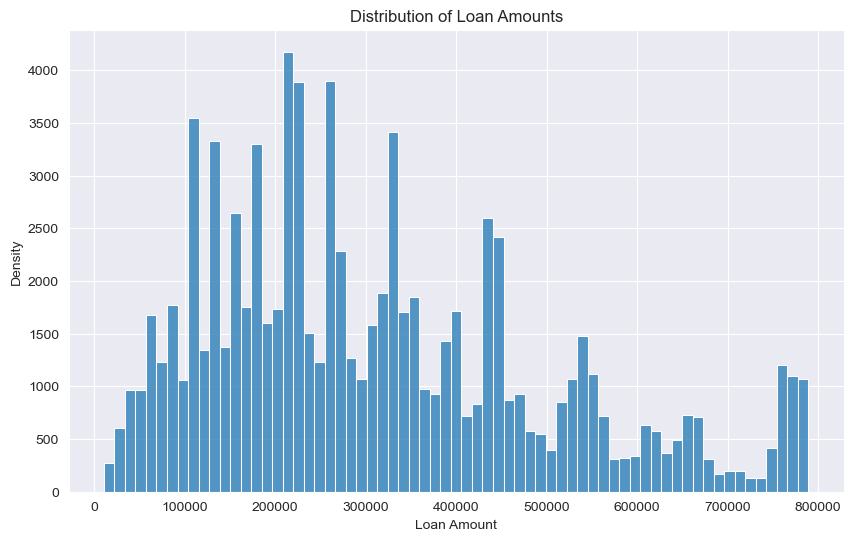

In [11]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data=backup_data['Current Loan Amount'])
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

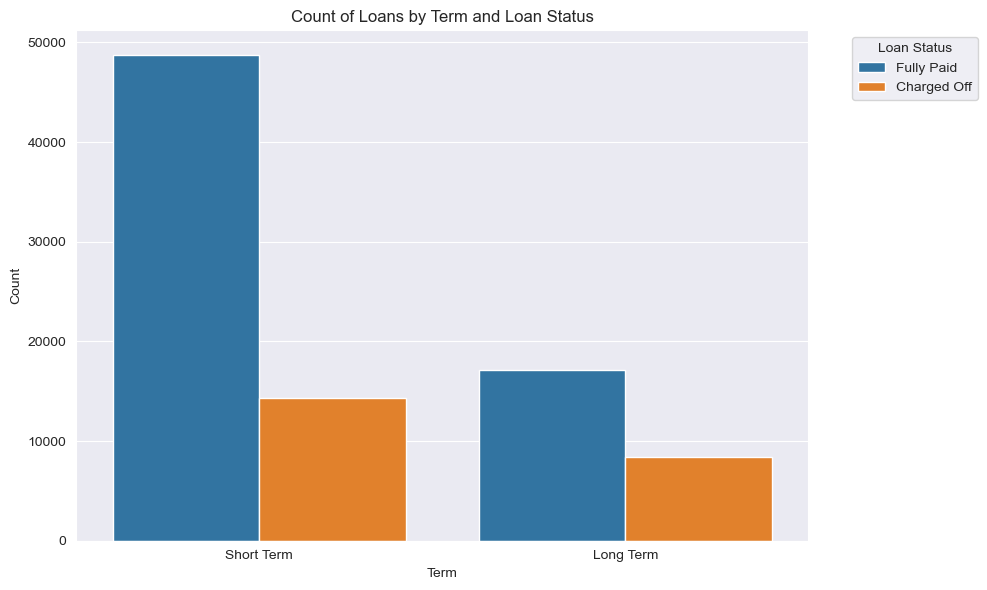

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=backup_data, x='Term', hue='Loan Status')
plt.title('Count of Loans by Term and Loan Status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

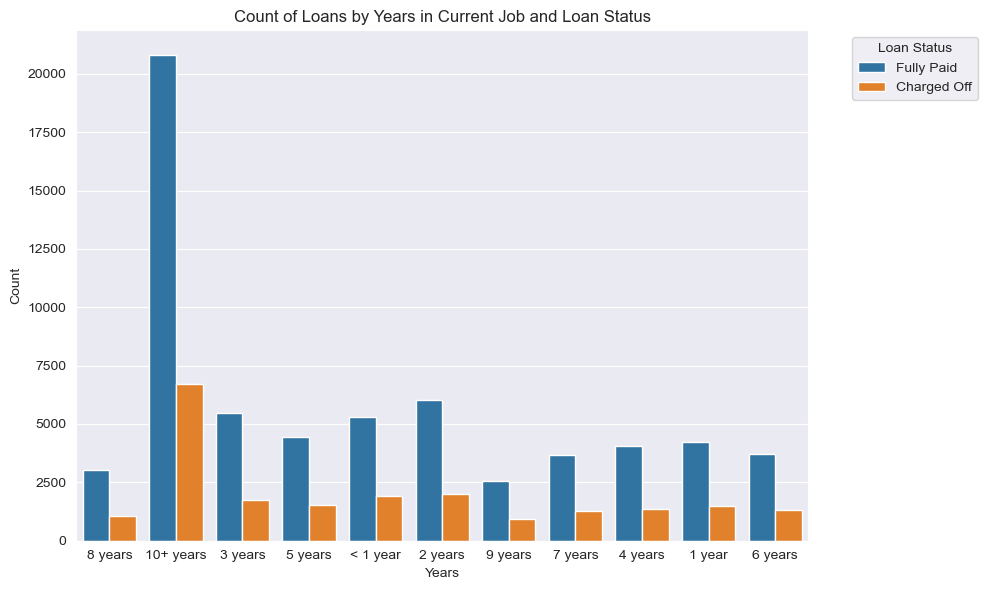

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=backup_data, x='Years in current job', hue='Loan Status')
plt.title('Count of Loans by Years in Current Job and Loan Status')
plt.xlabel('Years')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

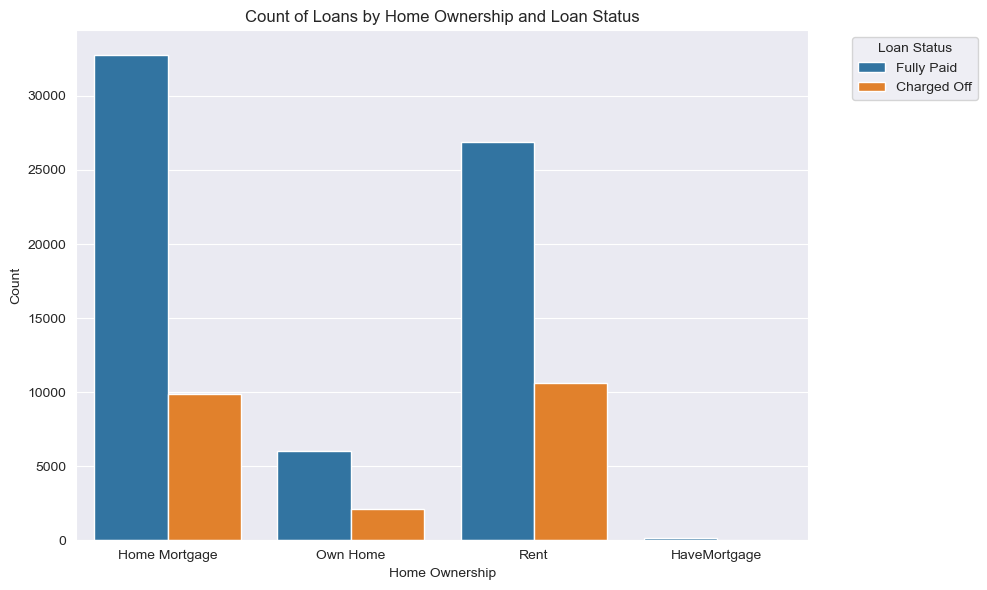

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=backup_data, x='Home Ownership', hue='Loan Status')
plt.title('Count of Loans by Home Ownership and Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

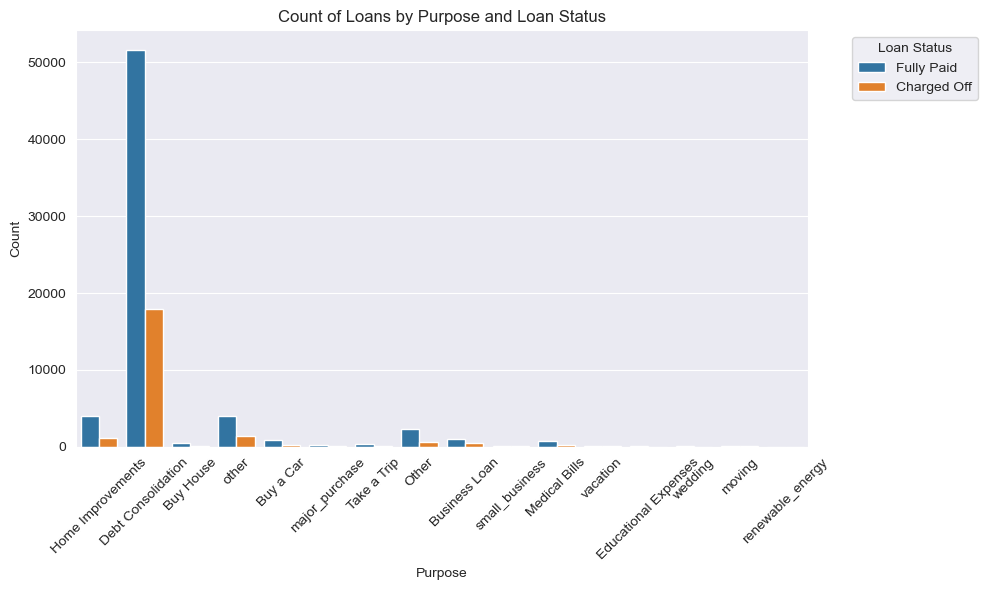

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=backup_data, x='Purpose', hue='Loan Status')
plt.title('Count of Loans by Purpose and Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

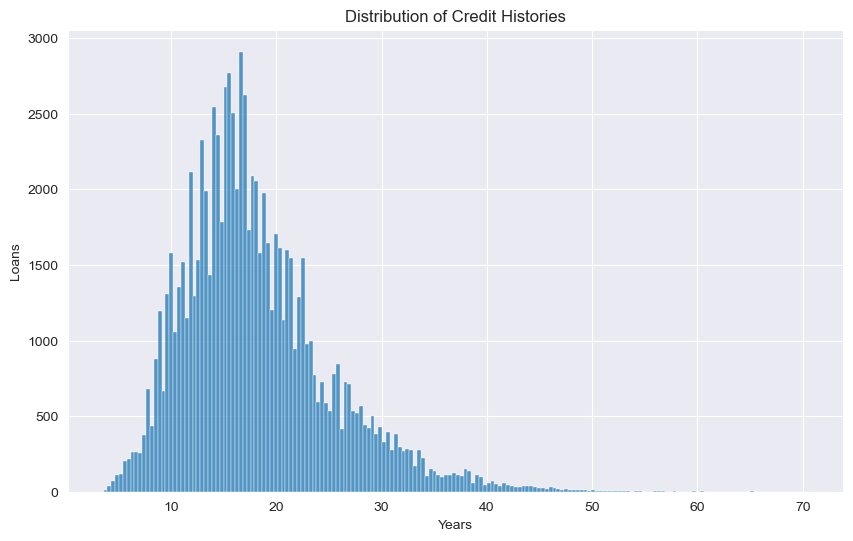

In [16]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data=backup_data['Years of Credit History'])
plt.title('Distribution of Credit Histories')
plt.xlabel('Years')
plt.ylabel('Loans')
plt.show()

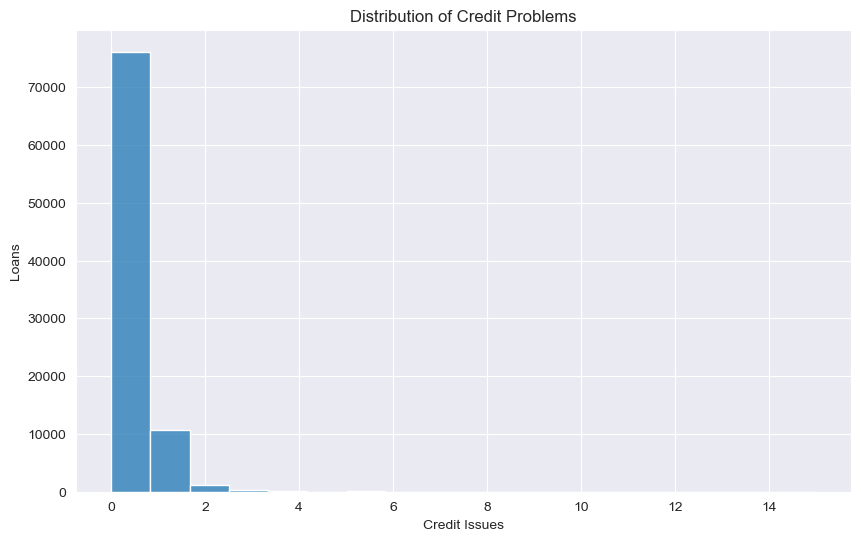

In [17]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data=backup_data['Number of Credit Problems'])
plt.title('Distribution of Credit Problems')
plt.xlabel('Credit Issues')
plt.ylabel('Loans')
plt.show()

In [18]:
backup_data.drop(columns=['Years in current job'], inplace=True)
backup_data.dropna(inplace=True)
backup_data

C:\Users\Andras\AppData\Local\Temp\ipykernel_19900\1242628479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backup_data.drop(columns=['Years in current job'], inplace=True)
C:\Users\Andras\AppData\Local\Temp\ipykernel_19900\1242628479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backup_data.dropna(inplace=True)


,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan ID,,,,,,,,,,,,,,,,,
273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
2e841c8f-3dc1-464d-91c1-3d3d51e64c38,2ac05980-7848-4692-89ae-9321afe650f8,Fully Paid,234124.0,Short Term,727.0,693234.0,Rent,Debt Consolidation,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0
24e8c8bd-d10b-4dac-8b81-1da470ff5ecb,967e8733-7189-49b7-a3ab-6a1d0e1abdac,Fully Paid,666204.0,Long Term,723.0,1821967.0,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0
150ebbad-ebed-441e-b70d-2f350ad7dca6,40f729c9-54c7-4768-9fb5-2fa41d074c48,Charged Off,317108.0,Long Term,687.0,1133274.0,Rent,Debt Consolidation,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dbc74100-3f51-4e30-9941-e88231563740,d1592b7e-ed4a-40e7-aa22-1d05a9d28bd7,Fully Paid,758450.0,Short Term,726.0,1590775.0,Home Mortgage,Debt Consolidation,24259.39,18.1,25.0,11.0,0.0,850820.0,1287792.0,0.0,0.0
3b2a09bb-3467-4d2f-bd8f-260fdc5760be,da2f2054-0f33-4b84-9234-508e42f6f493,Fully Paid,179454.0,Short Term,708.0,1356068.0,Home Mortgage,Debt Consolidation,22318.54,22.7,21.0,25.0,0.0,387410.0,1705616.0,0.0,0.0
79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,44484.0,Short Term,717.0,1152426.0,Home Mortgage,small_business,6280.64,21.0,12.0,6.0,0.0,961932.0,0.0,0.0,0.0


In [19]:
backup_data['loan_status_num']=backup_data['Loan Status'].map({'Fully Paid':0,
                                                          'Charged Off':1})

C:\Users\Andras\AppData\Local\Temp\ipykernel_19900\131428247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backup_data['loan_status_num']=backup_data['Loan Status'].map({'Fully Paid':0,


In [20]:
condition = backup_data['Credit Score'] > 850

# Apply the condition to divide the 'Credit Score' values by ten
backup_data.loc[condition, 'Credit Score'] = backup_data.loc[condition, 'Credit Score'] / 10

In [21]:
backup_data.to_pickle('../data/backup_data.pkl')